### 1. Develop a DMD model to forecast the future population states

#### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/table.csv')
df = df.set_index(['year'])
df.head()

,hare,lynx
year,,
1845,20,32
1847,20,50
1849,52,12
1851,83,10
1853,64,13


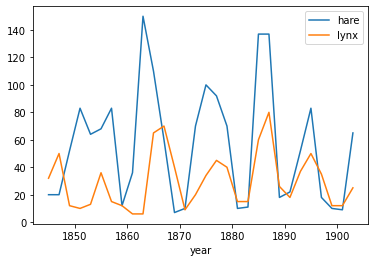

In [3]:
df.plot()

#### Prepare variables

In [4]:
years = df.index.values
x    = df.values
x

array([[ 20,  32],
       [ 20,  50],
       [ 52,  12],
       [ 83,  10],
       [ 64,  13],
       [ 68,  36],
       [ 83,  15],
       [ 12,  12],
       [ 36,   6],
       [150,   6],
       [110,  65],
       [ 60,  70],
       [  7,  40],
       [ 10,   9],
       [ 70,  20],
       [100,  34],
       [ 92,  45],
       [ 70,  40],
       [ 10,  15],
       [ 11,  15],
       [137,  60],
       [137,  80],
       [ 18,  26],
       [ 22,  18],
       [ 52,  37],
       [ 83,  50],
       [ 18,  35],
       [ 10,  12],
       [  9,  12],
       [ 65,  25]])

In [5]:
x.shape

(30, 2)

In [6]:
r   = 2
X1  = x[:-1]
X2  = x[1:]

#### Define DMD function 

In [7]:
def DMD(X,Xprime,r):
    
    # Step 1
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) 
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    
    # Step 2
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T 
    
    # Step 3
    Lambda, W = np.linalg.eig(Atilde) 
    Lambda = np.diag(Lambda)
    
    # Step 4
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W 
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    
    return Phi, Lambda, b

#### Run DMD

In [8]:
Phi, Lambda, b = DMD(X1,X2,r)

In [9]:
b

array([-555.27091596,  -87.26562251])

In [10]:
Lambda

array([[0.7247559 , 0.        ],
       [0.        , 0.37843393]])

In [11]:
Phi

array([[-3.27248622e-02, -2.06827921e-01],
       [-1.42128429e-01,  1.57386617e-01],
       [-2.31284009e-01,  3.05138655e-01],
       [-1.75782583e-01,  2.04129162e-01],
       [-1.76043070e-01,  8.61804441e-02],
       [-2.28866899e-01,  2.75683604e-01],
       [-2.83365120e-02, -1.80585678e-02],
       [-9.95121940e-02,  1.22554604e-01],
       [-4.23819158e-01,  6.22573380e-01],
       [-2.81505347e-01,  9.95585902e-02],
       [-1.36848341e-01, -1.49202942e-01],
       [-5.76708359e-04, -2.04937503e-01],
       [-2.40971820e-02, -9.15779625e-03],
       [-1.89467417e-01,  1.89208868e-01],
       [-2.68043448e-01,  2.38318612e-01],
       [-2.39967423e-01,  1.38428462e-01],
       [-1.79798978e-01,  7.13886623e-02],
       [-2.11966504e-02, -4.45038578e-02],
       [-2.40414483e-02, -4.01177282e-02],
       [-3.60732001e-01,  2.47439141e-01],
       [-3.51063562e-01,  1.29618936e-01],
       [-3.86373926e-02, -7.42159338e-02],
       [-5.38839598e-02, -9.54333328e-03],
       [-1.

#### Forecast 10 time steps

In [12]:
omega = np.log(Lambda)/2

In [13]:
forecast = []

for i in range(10):
    x = Phi @ np.exp(omega*i) * b
    forecast.append(x)
forecast = np.array(forecast)

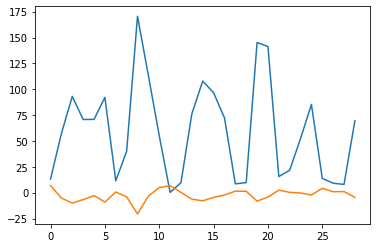

In [14]:
plt.plot(forecast[2])